In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [549]:
def generate_data(m):
  # ADD YOUR CODES

  # Here, we are going to generate data by discretizing the interval as specified in the statement.
  X_init = np.array([i/m for i in range(1, m+1)])
  
  # Let create our different features as defined in the statement 
  feat_1 = np.exp(X_init)
  feat_2 = np.sqrt(X_init)
  feat_3 = np.log(X_init + 1)
  # 
  y = np.cos(np.pi * X_init)
  X = np.column_stack((feat_1, feat_2, feat_3))
  
    
  return X, y ,X_init

In [550]:
# cgs
def cgs(A):
  """
    Q,R = cgs(A)
    Apply classical Gram-Schmidt to mxn rectangular/square matrix. 

    Parameters
    -------
    A: mxn rectangular/square matrix   

    Returns
    -------
    Q: mxn square matrix
    R: nxn upper triangular matrix

  """
  # Here we defined a function that compute the norm
  # def norm(x):
  #   r = 0
  #   for el in x:
  #     if el < 0:
  #       el =  (-1) * el
  #     r += el**2
  #   norm = r**(1/2)
  #   return norm
  # ADD YOUR CODES
  # m=... # get the number of rows of A
  # n=... # get the number of columns of A
  m = A.shape[0]
  n = A.shape[1]

  # R= ... # create a zero matrix of nxn
  # Q = ... 
  R = np.zeros((n,n))
  Q = np.empty((m,n))
  for k in range(n):
    w = A[k]
    for j in range(k-1):
      R[j][k] = Q[j].T@w
    for j in range(k-1):
      w = w - R[j][k]*Q[j]
    # R[k][k] = norm(w)
    R[k][k] = np.linalg.norm(w)
    Q[k] = w / R[k][k]
  
  return Q, R

In [551]:
# Implement BACK SUBS
def backsubs(U, b):

  """
  x = backsubs(U, b)
  Apply back substitution for the square upper triangular system Ux=b.

  Parameters
  -------
    U: nxn square upper triangular array
    b: n array
    

  Returns
  -------
    x: n array
  """

  n = U.shape[1]
  x = np.zeros((n,))
  b_copy = np.copy(b)

  if U[n-1,n-1] == 0.0:
    if b[n-1] != 0.0:
      print("System has no solution.")
  else:
    x[n-1] = b_copy[n-1] / U[n-1,n-1]
  for i in range(n-2,-1,-1):
    if U[i,i] == 0.0:
      if b[i] != 0.0:
        print("System has no solution.")
    else:
      for j in range(i,n):
        b_copy[i] -= U[i,j] * x[j]
      x[i] = b_copy[i] / U[i,i]
  return x

In [552]:
## Get X and y
m = 100000
X, y, X_init = generate_data(m)
X

array([[1.00001000e+00, 3.16227766e-03, 9.99995000e-06],
       [1.00002000e+00, 4.47213595e-03, 1.99998000e-05],
       [1.00003000e+00, 5.47722558e-03, 2.99995500e-05],
       ...,
       [2.71822746e+00, 9.99990000e-01, 6.93137181e-01],
       [2.71825465e+00, 9.99995000e-01, 6.93142181e-01],
       [2.71828183e+00, 1.00000000e+00, 6.93147181e-01]])

In [553]:
# Add ones
def add_ones(X):
  # ADD YOUR CODES
  return np.column_stack((np.ones(len(X), dtype='float'), X))

In [554]:
# Add ones to X
X = add_ones(X)
X

array([[1.00000000e+00, 1.00001000e+00, 3.16227766e-03, 9.99995000e-06],
       [1.00000000e+00, 1.00002000e+00, 4.47213595e-03, 1.99998000e-05],
       [1.00000000e+00, 1.00003000e+00, 5.47722558e-03, 2.99995500e-05],
       ...,
       [1.00000000e+00, 2.71822746e+00, 9.99990000e-01, 6.93137181e-01],
       [1.00000000e+00, 2.71825465e+00, 9.99995000e-01, 6.93142181e-01],
       [1.00000000e+00, 2.71828183e+00, 1.00000000e+00, 6.93147181e-01]])

In [555]:
import random
#we added the above import which allow us to generated the random index for facilitate us to shuffle data before the split

def split_data(X, Y, train_size):
  # ADD YOUR CODES
  np.random.seed(2)
  
  # shuffle data using random from numpy
  X_shuffled = np.random.permutation(X)
  Y_shuffled = np.random.permutation(Y)

  train_size = int(train_size * len(X))

  X_train = X_shuffled[:train_size,]
  X_test = X_shuffled[train_size:,]
  y_train = Y_shuffled[:train_size,]
  y_test = Y_shuffled[train_size:,]

  return X_train, X_test, y_train, y_test

In [556]:
# Split (X,y) into X_train, X_test, y_train, y_test
train_size = 0.80
X_train, X_test, y_train, y_test = split_data(X,y, train_size)
print(f"size of X_train : {X_train.shape}")
print(f"size of X_test : {X_test.shape}")
print(f"size of y_train : {y_train.shape}")
print(f"size of y_test : {y_test.shape}")

size of X_train : (80000, 4)
size of X_test : (20000, 4)
size of y_train : (80000,)
size of y_test : (20000,)


In [557]:
def mse(y, y_pred):
  # ADD YOUR CODES
  mse = (1/len(y))* np.sum(np.square(np.subtract(y, y_pred)))
  return mse

In [558]:
def normalEquation(X,y):
  # ADD YOUR CODES
  theta = np.linalg.inv(X.T@X)@X.T@y

  return theta

In [559]:
class LinearRegression:

  def __init__(self, arg, theta = None):
    # ADD YOUR CODES
    self.theta = theta
    self.arg = arg
      
  def fit(self,x,y):
    # ADD YOUR CODES
    if self.arg == "cgs":
      Q, R = cgs(x)
      self.theta = backsubs(R, Q.T@y)
    elif self.arg == "ne":
      self.theta = normalEquation(x,y)
    return self.theta

    
  def predict(self,x):
    #ADD YOUR CODES
    return x@self.theta

  def plot(self, axis_zero, axis_one, title, xlabel, ylabel):
    # ADD YOUR CODES
    # f(x)= cos(πx)
    # g(x)= θ_1exp(x) + θ_2√x + θ_3ln(x + 1)
    # x: xi = i/m, 1 ≤ i ≤ m

    plt.figure(figsize=(10,6))
    plt.plot(X_init, axis_zero, label="True values")
    plt.plot(X_init, axis_one, label="Predicted Values")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(-1.5,2.5)
    plt.title(title)
    plt.legend(['True values', 'Predicted Values'])
    plt.show()

In [560]:
# Instanciate the LinearRegression class 
# model= ...
model_ne = LinearRegression('ne')
model_cgs = LinearRegression('cgs')

In [561]:
# Train the model
theta_ne = model_ne.fit(X_train,y_train)
theta_cgs = model_cgs.fit(X_train,y_train)

In [562]:
# print the learned theta
print("--- The learned theta with Normal Equation ---")
print(theta_ne)
print()
print("--- The learned theta with CGS ---")
print(theta_cgs)

--- The learned theta with Normal Equation ---
[-0.06802258  0.01632958  0.23576303 -0.30412553]

--- The learned theta with CGS ---
[ 2.83303119 -0.35244095 -3.11065842 -0.12157783]


In [563]:
# Make a prediction on X_test
ne_predict_values = model_ne.predict(X_test)
cgs_predict_values = model_cgs.predict(X_test)
# 
ne_predict_values_add_ones = model_ne.predict(X)
cgs_predict_values_add_ones = model_cgs.predict(X)
print("--- Predicted values through normal equation with add_ones() ---")
print(ne_predict_values)
print()
print("--- Predicted values through cgs with add_ones() ---")
print(cgs_predict_values)

--- Predicted values through normal equation with add_ones() ---
[ 0.0012623  -0.01806871  0.00048624 ...  0.00095121  0.00063485
  0.00057116]

--- Predicted values through cgs with add_ones() ---
[-1.30379532  1.89676177 -0.71701661 ... -1.21236027 -0.60102236
 -1.04379882]


In [564]:
ne_predict_values_whitout = model_ne.predict(X)
cgs_predict_values_whitout = model_cgs.predict(X)
print("--- Predicted values through normal equation without add_ones() ---")
print(ne_predict_values)
print()
print("--- Predicted values through cgs without add_ones() ---")
print(cgs_predict_values)

--- Predicted values through normal equation without add_ones() ---
[ 0.0012623  -0.01806871  0.00048624 ...  0.00095121  0.00063485
  0.00057116]

--- Predicted values through cgs without add_ones() ---
[-1.30379532  1.89676177 -0.71701661 ... -1.21236027 -0.60102236
 -1.04379882]


In [565]:
# Compute the MSE (Evaluate both, regression and classification)
mse_ne = mse(y_test, ne_predict_values)
mse_cgs = mse(y_test, cgs_predict_values)
print("--- MSE for Noraml Equation ---")
print(mse_ne)
print()
print("--- MSE for CGS ---")
print(mse_cgs)

--- MSE for Noraml Equation ---
0.4978843746297357

--- MSE for CGS ---
1.3611326992212045


In [566]:
# Call your plot method: And make all the possible plots.

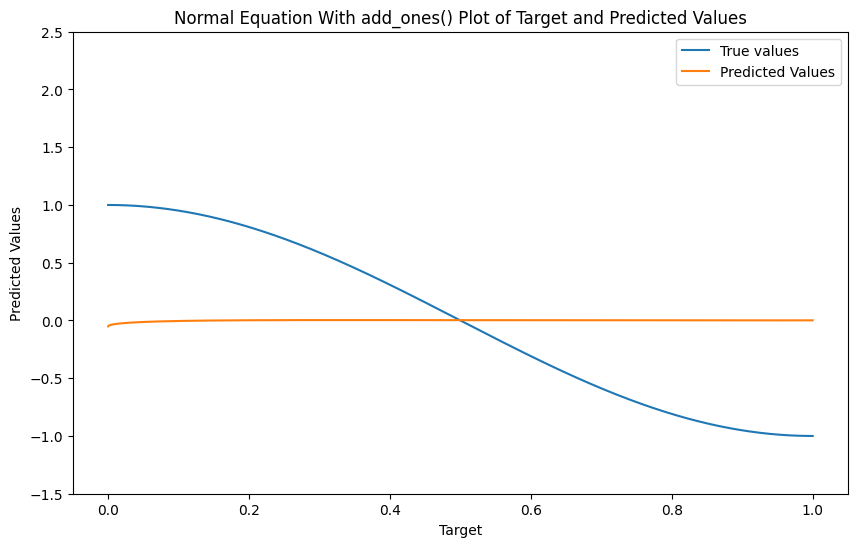

In [567]:
title = "Normal Equation With add_ones() Plot of Target and Predicted Values"
xlabel = "Target"
ylabel = "Predicted Values"

model_ne.plot(y, ne_predict_values_add_ones, title, xlabel, ylabel)


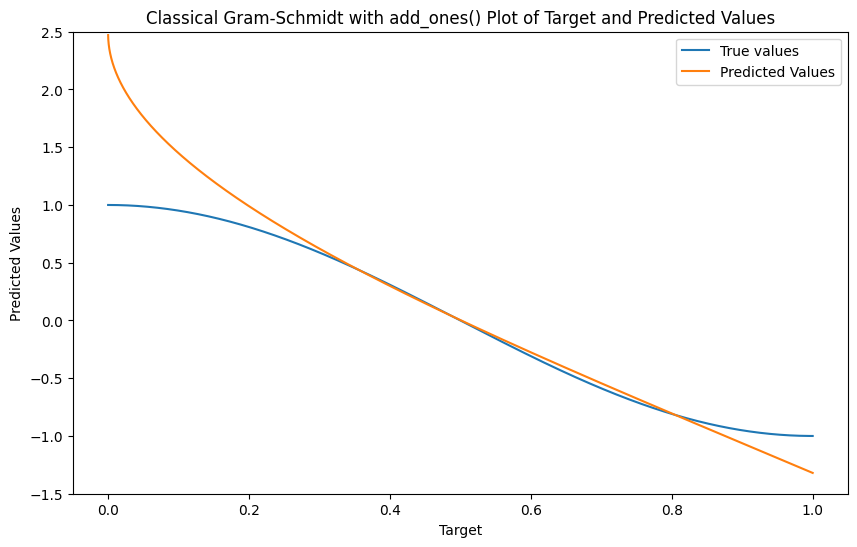

In [568]:
title = "Classical Gram-Schmidt with add_ones() Plot of Target and Predicted Values"
xlabel = "Target"
ylabel = "Predicted Values"

model_ne.plot(y, cgs_predict_values_add_ones, title, xlabel, ylabel)

# Plotting without add_ones()

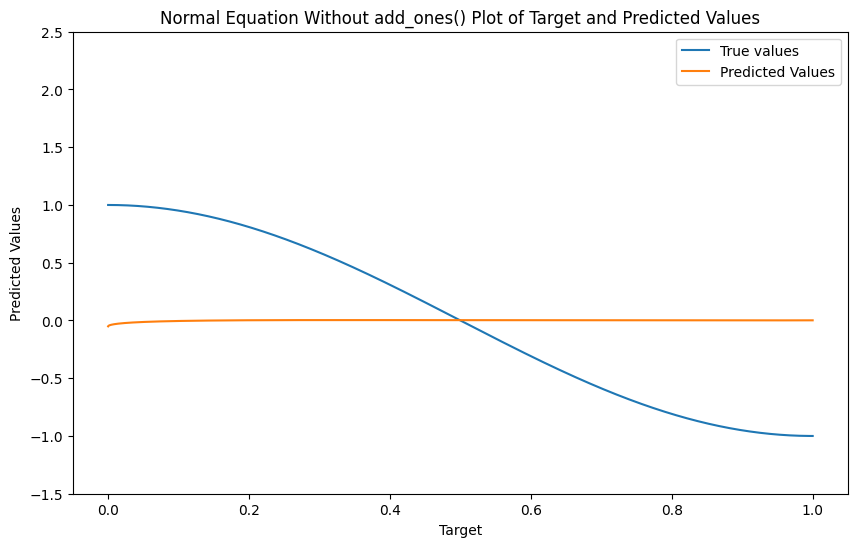

In [525]:
title = "Normal Equation Without add_ones() Plot of Target and Predicted Values"
xlabel = "Target"
ylabel = "Predicted Values"

model_ne.plot(y, ne_predict_values_whitout, title, xlabel, ylabel)

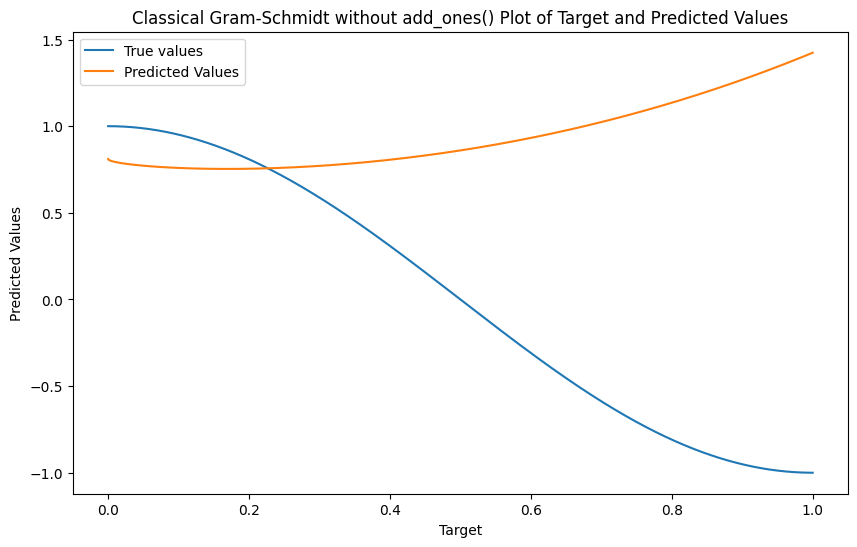

In [493]:
title = "Classical Gram-Schmidt without add_ones() Plot of Target and Predicted Values"
xlabel = "Target"
ylabel = "Predicted Values"

model_ne.plot(y, cgs_predict_values_whitout, title, xlabel, ylabel)